In [1]:
import arviz as az
import matplotlib.pyplot as plt
from matplotlib import style
style.use('plotting.mplstyle')
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
# Read in inference data from GWTC-2 and form KDE
data_gwtc2 = az.from_netcdf("../data/effective_spin_gaussian_spike_gwtc2.cdf")
zetas_gwtc2 = data_gwtc2.posterior.stack(draws=("chain", "draw")).zeta_spike.values
kde_gwtc2 = gaussian_kde(zetas_gwtc2,bw_method='scott')

# Read in inference data from GWTC3 and form KDE
data_gwtc3 = az.from_netcdf("../data/effective_spin_gaussian_spike.cdf")
zetas_gwtc3 = data_gwtc3.posterior.stack(draws=("chain", "draw")).zeta_spike.values
kde_gwtc3 = gaussian_kde(zetas_gwtc3,bw_method='scott')

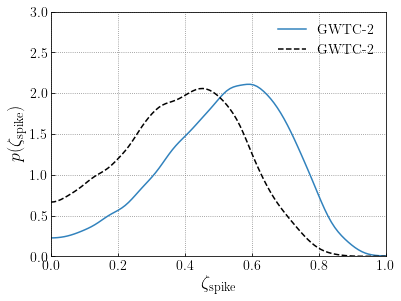

In [4]:
fig,ax = plt.subplots(figsize=(6,4.5))
grid = np.linspace(0,1,100)

# Plot results
ax.plot(grid,kde_gwtc2(grid) + kde_gwtc2(2.-grid) + kde_gwtc2(-grid),color='#3182bd',label='GWTC-2')
ax.plot(grid,kde_gwtc3(grid) + kde_gwtc3(2.-grid) + kde_gwtc3(-grid),color='black',ls='--',label='GWTC-2')
        
ax.set_xlim(0,1)
ax.set_ylim(0,3)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel(r'$\zeta_\mathrm{spike}$',fontsize=18)
ax.set_ylabel(r'$p(\zeta_\mathrm{spike})$',fontsize=18)
ax.axes.grid(True,which='major',ls=':',color='grey')
ax.legend(loc='upper right')

ax.set_rasterization_zorder(1)
plt.savefig('figure_13.pdf',bbox_inches='tight',dpi=200)
plt.show()